# 필요한 라이브러리 설치
## import 오류 발생 시 아래 셀 주석 해제 후 실행

In [4]:
# !conda install -c conda-forge missingno
# !pip3 install seaborn==0.9.0
# !pip install plotly==5.3.1
# !conda install -c plotly plotly_express==0.4.0
# !pip install squarify
# !conda install -c conda-forge wordcloud

# 자동화 분석 및 보고서 생성

In [5]:
#----------------기본 데이터 전처리 패키지--------------
import pandas as pd
import numpy as np
import datetime


#---------------시각화 라이브러리----------------
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import squarify
from matplotlib import rcParams

#--------------워드클라우드를 위한 라이브러리
from collections import Counter
import collections
from wordcloud import WordCloud




#-------------IO 라이브러리--------------
import sys
import os
from os import path
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
sns.set_context('poster')
sns.set_style('white')

#-------------이미지 라이브러리----------
from PIL import Image

#-------------보고서 제작 라이브러리
from tkinter import *
from fpdf import FPDF
import subprocess

#------------pdf 출력 라이브러리-----------
import webbrowser



ID = ""
message_dictionary = {'temp_key':'temp_value'}
def main():
    not (path.exists('./log_data'))
    dir_path = "./log_data"
    if(not path.exists(dir_path)):
        os.mkdir(dir_path)
        file_lst = os.listdir('./hs_g73_m08')

        # 현재 디렉토리내에 각각의 파일을 출력
        ID_list = []
        for file in file_lst:
            filepath = './hs_g73_m08/' + file
            ID_list.append(file.split('_')[1])
        for i in range(len(ID_list)):
            try:
                try:
                    data = pd.read_csv('./hs_g73_m08/hs_{}_m08_0903_1355.csv'.format(ID_list[i]),engine='python', encoding= 'cp949')
                except:
                    data = pd.read_csv('./hs_g73_m08/hs_{}_m08_0903_1356.csv'.format(ID_list[i]),engine='python', encoding= 'cp949')
            except:
                try:
                    data = pd.read_csv('./hs_g73_m08/hs_{}_m08_0903_1355.csv'.format(ID_list[i]))
                except:
                    data = pd.read_csv('./hs_g73_m08/hs_{}_m08_0903_1356.csv'.format(ID_list[i]))
            data.to_csv('./log_data/hs_{}_m08_0903_1355.csv'.format(ID_list[i]),encoding='utf-8-sig')



    class GUI:
        def __init__(self, master):
            self.master = master
            self.master.geometry("300x300")
            self.master.resizable(0,0)
            self.frame = Frame(self.master, width = 10000, height = 600)
            self.master.title("순이의 건강 레포트")
            self.label_code = Label(self.frame, text = "ID를 입력해주세요")
            self.entry_code = Entry(self.frame)
            self.button_code = Button(self.frame, command = self.click_code, text = "보고서 생성")
            self.button_exit = Button(self.frame, command = self.click_exit, text = "취소")
            self.label_status = Label(self.frame, text = "")
        def pack(self):
            self.label_code.pack()
            self.entry_code.pack()
            self.button_code.pack()
            self.button_exit.pack()
            self.label_status.pack()
            self.frame.pack()
        def click_code(self):
            self.label_status.destroy()
            self.label_status = Label(self.frame, text = "loading... it may take a while")
            self.label_status.pack()
            getID(self.entry_code.get())
            self.master.destroy()
        def click_exit(self):
            self.master.destroy()
    def getID(id):
        global ID
        ID = id

    root = Tk()
    app = GUI(root)
    app.pack()
    root.mainloop()


    user_img_dir_path = "./img/" + ID
    if(not path.exists(user_img_dir_path)):
        os.mkdir(user_img_dir_path)



    #전처리
    #Time 관련 feature 전처리
    data = pd.read_csv('./log_data/hs_'+ ID +'_m08_0903_1355.csv')

    data['year'] = data['Time'].apply(lambda x: int(x[1:5]))
    data['month'] = data['Time'].apply(lambda x: int(x[6:8]))
    data['day'] = data['Time'].apply(lambda x: int(x[9:11]))
    data['hour'] = data['Time'].apply(lambda x: int(x[12:14]))
    data['minute'] = data['Time'].apply(lambda x: int(x[15:17]))
    data['second'] = data['Time'].apply(lambda x: int(x[18:20]))

    def return_weekday(vec):
        year = vec[0]
        month = vec[1]
        day = vec[2]
        days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Satureday','Sunday']
        b = days[datetime.date(year,month,day).weekday()]
        return b

    def korean_weekday_encoding(weekday):
        if weekday == 'Monday':
            return '월요일'
        elif weekday == 'Tuesday':
            return '화요일'
        elif weekday == 'Wednesday':
            return '수요일'
        elif weekday == 'Thursday':
            return '목요일'
        elif weekday == 'Friday':
            return '금요일'
        elif weekday == 'Satureday':
            return '토요일'
        elif weekday == 'Sunday':
            return '일요일'

    data['Weekday2'] = data[['year','month','day']].apply(return_weekday,axis=1)
    data['Weekday'] = data['Weekday2'].apply(korean_weekday_encoding)



    #순이의 대화 내용
    순이_대화내용_1 = data[~(data['Message_1']).isnull()]['Message_1'].reset_index(drop=True)
    순이_대화내용_2 = data[~(data['Message_2']).isnull()]['Message_2'].reset_index(drop=True)
    순이_대화내용_3 = data[~(data['Message_3']).isnull()]['Message_3'].reset_index(drop=True)
    순이_대화내용 = pd.concat([순이_대화내용_1,순이_대화내용_2,순이_대화내용_3],axis=0).reset_index(drop=True)
    순이_대화내용 = 순이_대화내용[순이_대화내용.values != "프로그램 메시지"].reset_index(drop=True)
    순이_대화내용 = list(순이_대화내용.values)
    첫번째_순이_대화내용_수 = len(순이_대화내용_1)
    두번째_순이_대화내용_수 = len(순이_대화내용_2)
    세번째_순이_대화내용_수 = len(순이_대화내용_3)

    #사용자의 대화 내용
    사용자_대화내용_1 = data[~(data['STT_1']).isnull()]['STT_1'].reset_index(drop=True)
    사용자_대화내용_2 = data[~(data['STT_2']).isnull()]['STT_2'].reset_index(drop=True)
    사용자_대화내용_3 = data[~(data['STT_3']).isnull()]['STT_3'].reset_index(drop=True)
    사용자_대화내용 = pd.concat([사용자_대화내용_1,사용자_대화내용_2,사용자_대화내용_3],axis=0).reset_index(drop=True)
    첫번째_사용자_대화내용_수 = len(사용자_대화내용_1)
    두번째_사용자_대화내용_수 = len(사용자_대화내용_2)
    세번째_사용자_대화내용_수 = len(사용자_대화내용_3)

    #순이 대화 횟수
    순이_대화_횟수 = len(순이_대화내용)                    #전체 순이 대화내용 횟수
    사용자_대화_횟수 = len(사용자_대화내용)                #전체 사용자 대화내용 횟수



    contents_total = []
    stop_words='순이가 아 휴 아이구 아이쿠 아이고 어 왔어요! 어제 들고 뭘 오늘 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 순이'
    stop_words = stop_words.split(' ')
    for content_1 in 순이_대화내용:
        content_1 = content_1.replace('!', ' ')
        content_1 = content_1.replace('?', ' ')
        content_1 = content_1.replace('.', ' ')
        content_1 = content_1.replace(',', ' ')
        for content in content_1:
            content_list = content_1.split(' ')[1:]
            for content in content_list:
                if content not in stop_words:
                    contents_total.append(content)
    content_counts = Counter(contents_total)
    font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
    wordcloud = WordCloud(font_path = font_path,
                          background_color='white',
                          max_words = 10,
                         ).generate_from_frequencies(content_counts)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(user_img_dir_path + '/' + ID + '_대화워드클라우드.png')



    #plotly 함수 정의

    def plot_life_pattern(col):
        시간대별가장많이하는행동 = pd.DataFrame()
        시간대별가장많이하는행동['hour'] = np.array(range(24))
        State_list = []
        State_list_frequency = []
        for i in range(24):
            try:
                State_list.append(data[data['hour'] == i].pivot_table(index = col, values = 'owner_id', aggfunc = 'count').sort_values('owner_id', ascending = False).index[0])
                State_list_frequency.append(data[data['hour'] == i].pivot_table(index = col, values = 'owner_id', aggfunc = 'count').sort_values('owner_id', ascending = False)['owner_id'][0])
            except:
                State_list.append('기록없음')
                State_list_frequency.append(0)
        시간대별가장많이하는행동[col] = pd.Series(State_list)
        시간대별가장많이하는행동['Frequency'] = pd.Series(State_list_frequency)
        시간대별가장많이하는행동
        fig = px.bar(시간대별가장많이하는행동, x='hour', y="Frequency",text=col)
        fig.update_layout(
            title = "시간대별 가장 많이 하는 행동",
            width=1000,
            height=600,
            xaxis_title = "시간대",
            yaxis_title = '빈도수',
            font=dict(size = 20)
        )
        if(col == 'Act'):
            fig.write_image(user_img_dir_path + '/' + ID + "_" + col +'_시간대별가장많이식별된행동들.png')
    #     fig.show()
        return 시간대별가장많이하는행동
    pd_Act = plot_life_pattern('Act')



    def plot_most_behavior_treemap(col):
        count  = data.pivot_table(index=[col],values = 'owner_id',aggfunc='count').reset_index()
        fig = px.treemap(count, path = [col],values = 'owner_id')
        fig.update_layout(
            title = "요일별 가장 많이 하는 행동",
    #         xaxis_title = "시간대",
    #         yaxis_title = '빈도수',
            width=1300,
            height=1000,
            font=dict(size = 20)
        )
        if(col == 'Act'):
            fig.write_image(user_img_dir_path + '/' + ID + '_' + col +'_가장많이하는행동들(tree_map).png')
#         fig.show()

    def plot_most_behavior_piechart(col):
        count = data.pivot_table(index=[col],values = 'owner_id',aggfunc='count').sort_values('owner_id',ascending=False).reset_index()
        count_others = count[7:].sum()
        list_most_top4 = list(count['State'][:4])
#         print(list_most_top4)

        count_others[col] = '기타'
        count = count[:7]
        count = count.append(pd.Series(count_others),ignore_index=True)
        labels = count[col]
        values = count['owner_id']
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',pull=[0.1,0.08, 0])])
        if(col == 'State'):
            fig.write_image(user_img_dir_path + '/' + ID + '_' + col +'_가장많이하는행동들.png')
#         fig.show()
        return list_most_top4


    # list_most_top4 = plot_most_behavior_piechart('Act')


    list_most_top4 = plot_most_behavior_piechart('State')
    plot_most_behavior_treemap('Act')
    plot_most_behavior_treemap('State')

    def plot_Weekday_most_behavior_treemap(col):
        count  = data.pivot_table(index=['Weekday',col],values = 'owner_id',aggfunc='count').reset_index()
        count.rename(columns={'owner_id':'count'},inplace=True)
        fig = px.treemap(count, path = ['Weekday',col],values = 'count')
        fig.update_layout(
            title = "요일별 가장 많이 하는 행동",
    #         xaxis_title = "시간대",
    #         yaxis_title = '빈도수',
            width=1300,
            height=1000,
            font=dict(size = 20)
        )
        if(col == 'Act'):
            fig.write_image(user_img_dir_path + '/' + ID + '_' + col +'_요일별_가장_많이_하는_행동.png')
    #     fig.show()



    plot_Weekday_most_behavior_treemap('Act')


    def generate_message(mean,var, std, life_type):
        message = ""
    #     good_or_not: 2->good, 1-> soso, 0->bad, -1->no image to show
        good_or_not = -1

        if(life_type == '수면'):
            if var <= 1:
                message = [life_type + '패턴이 일정하시네요! 잘하고 계십니다. 수면 패턴을 유지할 경우 각종 질병을 예방할 수 있습니다!', ' 게다가 피부 노화도 예방되고, 더 상쾌한 아침을 맞이할 수 있다고 합니다. 앞으로도 계속 이를 유지하셔서 더 건강한 생활하시기를 순이가 응원합니다!']
                good_or_not = 2
            elif (var > 1) & (var <= 2):
                message = [life_type + '패턴이 규칙적이시네요. 수면 시간이 적정 수면시간(6-8시간)보다 많거나 적지는 않은지 살펴보세요!']
                good_or_not = 1
            else:
                message = [life_type + '패턴이 불규칙적입니다, 불규칙적인 수면은 장내염증을 일으킬 수 있고 비만, 고지혈증, 고혈압, 당뇨와 같은', ' 대사질환이 발생할 가능성이 약 27퍼센트 오른다고 해요, 순이가 혹시 도와드릴게 없을까요?']
                good_or_not = 0

        elif(life_type == '기상하기'):
            if var <= 1: #긍정
                message = ['기상 패턴이 일정하시네요! 규칙적인 기상 시간은 수면의 질을 높이는 좋은 방법입니다.']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['기상 패턴이 규칙적이시네요. 이대로 유지하신다면, 편히 수면을 할 수 있을거에요!']
                good_or_not = 1
            else: #부정
                message = ['기상 패턴이 불규칙적입니다. 불규칙적인 기상 시간은 수면의 질을 저하시킬 수 있으니 주의해주세요!']
                good_or_not = 0

        elif(life_type == '취미활동'):
            if var <= 1: #긍정
                message = ['취미 활동 패턴이 일정하시네요! 적절한 취미활동은 정신 건강에 도움이 된다고 하네요.']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['취미 활동을 규칙적으로 하시네요. 취미활동을 즐기시는 모습이 언제나 멋있어 보인답니다.']
                good_or_not = 2
            else: #긍정
                message = ['취미활동을 언제나 즐기는 편이시군요! 순이와 함께 취미활동을 해봐요.']
                good_or_not = 2

        elif(life_type == '집 환기하기'):
            if var <= 1: #긍정
                message = ['특정 시간에 환기를 자주 하시는 편이시군요! 환기는 실내의 오염물질을 줄이는 최고의 방법이죠.']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['환기 시간이 규칙적이시군요. 쾌적한 실내 공기를 유지하는 것은 호흡기 질환을 예방할 수 있답니다.']
                good_or_not = 1
            else: #긍정
                message = ['언제나 환기를 하시는 모습이 보기 좋습니다. 순이가 항상 응원할께요!']
                good_or_not = 1


        elif(life_type == '낮잠자기'):
            if var <= 1: #긍정
                message = ['낮잠을 규칙적으로 주무시는군요. 낮잠이 두뇌 건강에도 도움이 된다는 걸 알고 계셨나요?']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['낮잠을 너무 많이 주무시는 것은 아닌지 한번 체크해보세요! 적당한 낮잠은 기억력 향상에 도움이 많이 됩니다.']
                good_or_not = 1
            else: #부정
                message = ['너무 많은 낮잠은 건강에 악영향이 있을 수 있습니다. 수면이 적정 시간을 넘기지 않도록 유의해주세요!']
                good_or_not = 0

        elif(life_type == '외출하기'):
            if var <= 1: #긍정
                message = ['규칙적으로 외출을 하시네요. 참! 외출 시에는 오늘 날씨가 춥거나 덥지는 않은지 체크해보세요!']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['외출을 자주하기만 해도, 각종 질환을 예방할 수 있다고 하네요. ']
                good_or_not = 2
            else: #긍정
                message = ['외출 시에는 가스나 불을 켜고 나가지는 않는지, 꼼꼼히 확인해보세요!']
                good_or_not = 2

        elif(life_type == 'TV 보기'):
            if var <= 1: #긍정
                message = ['항상 똑같은 시간에 TV를 보시는군요! 즐겨 보시는 드라마가 있다면 순이에게도 알려주세요!']
                good_or_not = 2
            elif (var > 1) & (var <= 2): #긍정
                message = ['TV를 보는 시간이 규칙적이시네요. 가끔씩 스트레칭을 해보는 것은 어떨까요?']
                good_or_not = 1
            else: #부정
                message = ['과도한 TV 시청은 신체에 악영향을 줄 수 있습니다. 너무 많이 시청하지 않도록, 주의해주세요!']
                good_or_not = 0
        else: 
            message = []
            good_or_not = -1

        return message, good_or_not



    def encoding_minute(minute):
        return int(minute)/60

    def decoding_minute(minute):
        return minute*60

    #평균. 분산, 표준편차

    def life_pattern_comment(mean, var, std, life_type):
        minute = decoding_minute(mean%1)
        #평균 기상시간은: 22시 
        if (mean<24):
#             print('평균 \"'+life_type+'\" 시간은: {:.0f}시'.format(mean),'{:.0f}분 입니다'.format(minute))
            plot_title = '평균'+life_type+'시간은: {:.0f}시'.format(mean) + '{:.0f}분 입니다'.format(minute)
        else:
#             print('평균 \"'+life_type+'\" 시간은: {:.0f}시'.format(mean-24),'{:.0f}분 입니다'.format(minute))
            plot_title = '평균 \"'+life_type+'\" 시간은: {:.0f}시'.format(mean-24) + '{:.0f}분 입니다'.format(minute)
        message, good_or_not = generate_message(mean,var, std, life_type)
        print(message, good_or_not)
        return plot_title, message, good_or_not



   

    
    def check_pattern(state):
        data_equals_state = data[data['State'] == state].reset_index(drop=True).sort_values(by=['month','day','hour','minute','second'])
        state_time = data_equals_state.drop_duplicates(['month','day'],keep = 'last')
        #해당 데이터가 너무 적은 경우 분석을 진항하지 않음
        if(len(state_time) < 7):
#             print("\""+ state + "\" 의 기록이 너무 적어 분석하기 어려울 것 같아요")
    #         image = Image.open("./not_enough_log_data.jfif")
    #         image.show()
            return
        if(state == '수면'):
            state_time['preprocessed_hour'] = state_time['hour'].apply(lambda x: x+24 if x<12 else x)
        else:
            state_time['preprocessed_hour'] = state_time['hour']
        state_time['preprocessed_minute'] = state_time['minute'].apply(encoding_minute)
        state_time['preprocessed_hour'] = state_time['preprocessed_hour'] + state_time['preprocessed_minute']
        state_time[np.abs(state_time['preprocessed_hour'] - state_time['preprocessed_hour'].mean()) <= 3*state_time['preprocessed_hour'].std()]

        state_mean = state_time['preprocessed_hour'].mean()
        state_var = state_time['preprocessed_hour'].var()
        state_std = state_time['preprocessed_hour'].std()
        plot_title, message, good_or_not = life_pattern_comment(state_mean,state_var,state_std,state)
        plt.rcParams['font.family'] = 'NanumGothic'
        img = sns.displot(state_time['preprocessed_hour'], kde = False)
        img.set(xlabel = "\"" + state + "\"" +"시간", ylabel = "빈도수",title=plot_title )
        sns.set(font_scale=2)
        plt.gcf().set_size_inches(15, 12)

        global message_dictionary


        if(good_or_not == 2):
            plt.savefig(user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_good.png')
            message_dictionary[user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_good.png'] = message
        elif(good_or_not == 1):
            plt.savefig(user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_soso.png')
            message_dictionary[user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_soso.png'] = message
        elif(good_or_not == 0):
            plt.savefig(user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_badd.png')
            message_dictionary[user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_badd.png'] = message
        else:
            plt.savefig(user_img_dir_path + '/' + ID + '_' + state +'시간 분포도_noth.png')


    def get_more_than_7logs(col_type):
        more_than_7_logs = pd.DataFrame(data[col_type].value_counts())
        more_than_7_logs = more_than_7_logs[more_than_7_logs[col_type] >=7]
        State_unique_list = more_than_7_logs.index
        return list(State_unique_list)
    State_unique_list = get_more_than_7logs('State')
    for i in State_unique_list:
        check_pattern(i)


    from fpdf import FPDF
    import subprocess
    import random

    prepared_advices = [["커피를 마시면 혈압이 바로 올라가는 현상을 보이지만, ", "이 효과는 4일 정도면 내성이 생겨 혈압이 높아지는 현상이 줄어든다고 하네요."]
           ,["금연을 했던 사람과 지속적으로 흡연을 하는 사람의 폐를 비교해보면 한 번이라도 금연을 실천했던 사람의 폐 기능이", "그렇지 않은 사람에 비해 훨씬 좋다는 결과가 나왔다고 합니다."]
           ,["치아관리를 잘 하면 뇌졸중이나 심장병도 예방할 수 있습니다. 아침, 점심, 저녁식사 후 3분이내, 3분동안,", " 그리고 취침 전에 하는것이 바랍직합니다!"]
           ,["소화력이 떨어지는 경우에는 영양소를 많이 섭취하기 위해 갈아서 마시는 것이", " 2배이상 효과가 있다고 임상실험을 통해 밝혀졌다고 하네요!"]
           ,["꼭꼭 씹어서 삼키는 것이 건강에 좋다고 하네요. 라면을 먹을 때에도 10번은 씹어야", " 위에서 자연스럽게 소화시킬 수 있다고 합니다."]
           ,["매일 15분 씩 낮잠을 잔다면, 오전 중에 쌓인 피로를 말끔히 풀고 오후를 활기차게 보낼 수 있다고 합니다."]
           ,["간식은 식사 3~4시간 이후에 드시는 것을 추천드려요. 조금씩 자주 먹는 것은 장수의 지름길이라고 하네요."]
           ,["하루 30분 걷기를 생활화하세요! 지방이 연소되는 시점은", " 운동 후 20분이 지났을 때부터라고 하니, 걷기 운동을 같이 해봐요!"]
           ,["걷는 것이 지루해진다면, 산책로를 바꿔보는 것은 어떨까요? 코스를 바꾸는 것만으로도 지루함이 줄어들거에요!"]
           ,["물을 자주 마셔주는 것은 건강에 도움이 됩니다. 물을 자주 마시면,", " 혈액순환이 원활해지고 신진대사가 활발해진다고 하네요."]
           ,["적당한 운동은 혈액순환을 촉진시켜, 고혈압의 예방에 큰 도움이 된다고 합니다."]
           ,["평소 과식을 삼가고 취침 2~3시간 전에는 음식물 섭취를 피함으로써, 배탈이나 소화불량을 예방할 수 있습니다."]
           ,["대표적인 발효 식품인 김치 혹은 요구르트는 유산균 섭취에 큰 도움을 줍니다.", " 단, 당과 나트륨을 많이 섭취하지 않도록 주의하세요!"]]

    advices = random.sample(prepared_advices, 2)


    def pdf_configure(ID, userInfo):
        path = "pdf\\" + ID + "_practice.pdf"

        pdf = PDF('P', 'mm', 'A4')
        pdf.add_page()

    def start(ID):
        # get data
        data = pd.read_csv('./log_data/hs_'+ ID +'_m08_0903_1355.csv')
        profile_file = pd.read_csv('./log_data/user_profile.csv')

        profile_index = profile_file.index[profile_file.index[profile_file['id'] == int(ID)]].tolist()[0]
        profile = profile_file.iloc[profile_index]
        print(profile)
        userInfo = []
        if profile.sex == 'M':
            userInfo.append("남성")
        else:
            userInfo.append("여성")
        userInfo.append(str(profile.age))
        userInfo.append(profile.user_name)
        pdf_configure(ID, userInfo)

    class PDF(FPDF):
        # footer
        def footer(self):
            self.set_y(-15)
            self.set_font('helvetica', 'I', 10)
            self.cell(0, 10, f'Page {self.page_no()} /{{nb}}', align='C')

    def pdf_configure(ID, userInfo):
        name = userInfo[2]
        path = "pdf/" + ID + "_practice.pdf"
        images = os.listdir(f"./img/{ID}")
        try:
            images.remove('.ipynb_checkpoints')
        except:
            pass
        first_index = f'{ID}_State_가장많이하는행동들.png'
        first_first_index = f'{ID}_Act_가장많이하는행동들(tree_map).png'
        second_index = f'{ID}_Act_요일별_가장_많이_하는_행동.png'
        third_index = f'{ID}_Act_시간대별가장많이식별된행동들.png'
        fourth_index = f'{ID}_대화워드클라우드.png'
        print(fourth_index)
        counter = 0
        # First page
        # First page
        pdf = PDF('P', 'mm', 'A4')
        pdf.add_page()
        pdf.alias_nb_pages()

        # header info
        pdf.add_font('NanumBarunpenR', '', 'C:\\Windows\\Fonts\\NanumBarunpenR.ttf', uni=True)
        pdf.set_font('NanumBarunpenR', '', 30)
        pdf.cell(0, 35, "순이의 건강 레포트", align="C", ln=2, border = True)
        pdf.set_font('NanumBarunpenR', '', 17)
        pdf.cell(0, 5, align="R", ln=2)
        pdf.set_x(160)
        pdf.cell(0, 8, "이름: " + name, ln=1)
        pdf.set_x(160)
        pdf.cell(0, 8, "성별: " + userInfo[0], ln=1)
        pdf.set_x(160)
        pdf.cell(0, 8, "나이: " + userInfo[1], ln=1)

        # first standard graph (가장 많이 하는 행동)
        pdf.set_font('NanumBarunpenR', '', 12)
        pdf.cell(0, 10, f"먼저 {name} 님이 가장 많이 하시는 활동에 대해서 알아볼게요", ln=True)
        pdf.cell(0, 10, f" {name} 님의 활동 그래프", border=True, ln=True)
        pdf.cell(0, 10, f"", ln=True)
        pdf.image(f'./img/{ID}/{ID}_State_가장많이하는행동들.png', w = 100, x = -5)
        pdf.image(f'./img/{ID}/{ID}_Act_가장많이하는행동들(tree_map).png', w = 115, x = 90, y = 105, h = 75)

        pdf.cell(0, 8, "", ln = True)
        pdf.cell(0, 7, f"{name}님이 가장 많이 하시는 행동은 {list_most_top4[0]}입니다. 평소 생각하시던거랑 일치하나요? ㅎㅎ", ln=True)
        pdf.cell(0, 7, f"{name}님이 다음으로 많이 하시는 행동은 {list_most_top4[1]}입니다.", ln=True)
        pdf.cell(0, 7, f"{name}님이 세 번째로 많이 하시는 행동은~ 바로바로 {list_most_top4[2]}라고 하네요!", ln=True)
        pdf.cell(0, 7, f"{name}님이 네 번째로 많이 하시는 행동은 {list_most_top4[3]}입니다. 참고하셔서 알찬 하루 보내시기 바랍니다!", ln=True)

        images.remove(first_index)
        images.remove(first_first_index)
        # common sense
        pdf.cell(0, 8, "", ln = True)
        pdf.set_font('NanumBarunpenR', '', 17)
        pdf.cell(0, 12, f" 순이가 {name}님을 위해 전해주는 토막상식!", border=True, ln=True, align='C')
        pdf.set_font('NanumBarunpenR', '', 12)
        pdf.cell(0, 5, "", ln=True)
        for advice in advices[0]:
            pdf.cell(0, 7, f"{advice}", ln=True, align='C')
        pdf.cell(0, 7, "", ln=True)
        for advice in advices[1]:
            pdf.cell(0, 7, f"{advice}", ln=True, align='C')

        # Second Page
        # Second Page
        pdf.add_page()

        # second standard graph (요일별 행동)
        pdf.set_font('NanumBarunpenR', '', 12)
        pdf.cell(0, 10, f"다음으로는 {name} 님이 요일별로 가장 많이 하시는 활동이에요", ln=True)
        pdf.cell(0, 10, f" {name} 님의 요일별 활동 그래프", border=True, ln=True)
        pdf.cell(0, 12, f"", ln=True)
        pdf.image(f'./img/{ID}/{ID}_Act_요일별_가장_많이_하는_행동.png', w = 140, x = 35)
        images.remove(second_index)
        # third standard graph (시간별 행동)
        pdf.set_font('NanumBarunpenR', '', 12)
        pdf.cell(0, 10, f"마지막으로 {name} 님이 시간별로 가장 많이 하시는 활동에 대해서 알아볼게요", ln=True)
        pdf.cell(0, 10, f" {name} 님의 시간대별 활동 그래프", border=True, ln=True)
        pdf.cell(0, 10, f"", ln=True)
        pdf.image(f'./img/{ID}/{ID}_Act_시간대별가장많이식별된행동들.png', w = 160, h = 85, x = 30)
        images.remove(third_index)

        # Third Page
        # Third Page

        # fourth standard graph (대화워드 클라우드)
        pdf.add_page()
        pdf.cell(0, 10, "", ln=True)
        pdf.cell(0, 20, f"순이와 경순님이 어떤 대화를 나눴는지 확인해볼까요?", ln=True)
        pdf.cell(0, 10, f" 순이와의 대화 분석", border=True, ln=True)
        pdf.cell(0, 15, "", ln = True)
        pdf.image(f'./img/{ID}/{ID}_대화워드클라우드.png', w = 160, x = 20)
        pdf.cell(0, 10, f"순이와 첫 번째 대화 수: {첫번째_순이_대화내용_수}", align='C', ln=True)
        pdf.cell(0, 10, f"순이와 두 번째 대화 수: {두번째_순이_대화내용_수}", align='C', ln=True)
        pdf.cell(0, 10, f"순이와 세 번째 대화 수: {세번째_순이_대화내용_수}", align='C', ln=True)
        pdf.cell(0, 10, f"순이와 총 대화 수: {순이_대화_횟수}        답변률: {round((사용자_대화_횟수 * 100) / 순이_대화_횟수, 2)} %", align='C', ln=True)

        images.remove(fourth_index)
        print(images)
        # Fourth Page
        # Fourth Page

        pdf.add_page()
        loading = 1
        for image in images:
            message_count = 2
            counter += 1
            image_name = image[len(ID) + 1:-10]
            pdf.cell(0, 10, f" {name} 님의 {image_name}", border=True, ln=True)
            pdf.cell(0, 10, f"", ln=True)
            pdf.image(f'./img/{ID}/{image}', w = 130, h = 95, x = 40)
            if image[-8:-4] != "noth":
                for message in message_dictionary[f'./img/{ID}/{image}']:
                    message_count -= 1
                    pdf.cell(0, 7, message, ln=True)
                for _ in range(message_count):
                    pdf.cell(0, 7, "", ln=True)
            if counter == 1:
                if image[-8:-4] == 'noth':
                    pass
                else:
                    pdf.image(f'./static_img/{image[-8:-4]}.png', x = 20, y = 40, w = 30)
            if counter == 2:
                counter = 0
                if image[-8:-4] == 'noth':
                    pass
                else:
                    pdf.image(f'./static_img/{image[-8:-4]}.png', x = 20, y = 170, w = 30)
                if images.index(image) != (len(images) - 1):
                    pdf.add_page()
            loading += 1
        # create
        pdf.output('./pdf/' + ID + '_practice.pdf')
        subprocess.Popen([path], shell = True)
    start(ID)


['외출 시에는 가스나 불을 켜고 나가지는 않는지, 꼼꼼히 확인해보세요!'] 2
[] -1
['취미활동을 언제나 즐기는 편이시군요! 순이와 함께 취미활동을 해봐요.'] 2
['과도한 TV 시청은 신체에 악영향을 줄 수 있습니다. 너무 많이 시청하지 않도록, 주의해주세요!'] 0
['수면패턴이 불규칙적입니다, 불규칙적인 수면은 장내염증을 일으킬 수 있고 비만, 고지혈증, 고혈압, 당뇨와 같은', ' 대사질환이 발생할 가능성이 약 27퍼센트 오른다고 해요, 순이가 혹시 도와드릴게 없을까요?'] 0
['기상 패턴이 불규칙적입니다. 불규칙적인 기상 시간은 수면의 질을 저하시킬 수 있으니 주의해주세요!'] 0
id            1030
sex              F
age             80
user_name       경순
Unnamed: 4     NaN
Unnamed: 5     NaN
Unnamed: 6     NaN
Name: 109, dtype: object
1030_대화워드클라우드.png
['1030_TV 보기시간 분포도_badd.png', '1030_귀가하기시간 분포도_noth.png', '1030_기상하기시간 분포도_badd.png', '1030_수면시간 분포도_badd.png', '1030_외출하기시간 분포도_good.png', '1030_취미활동시간 분포도_good.png']


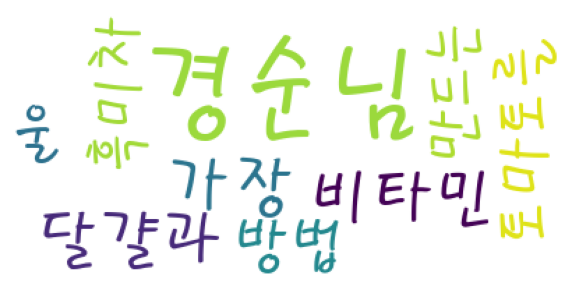

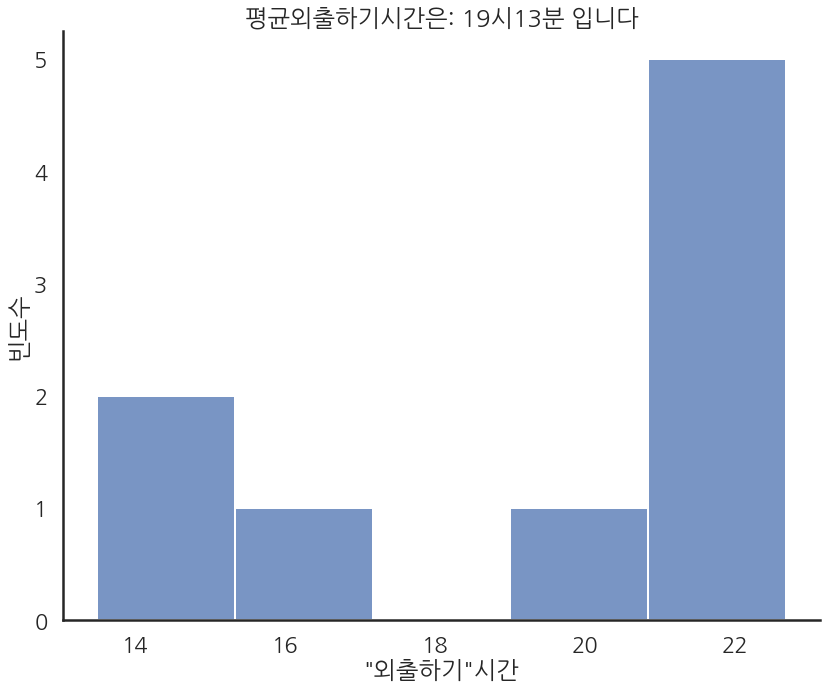

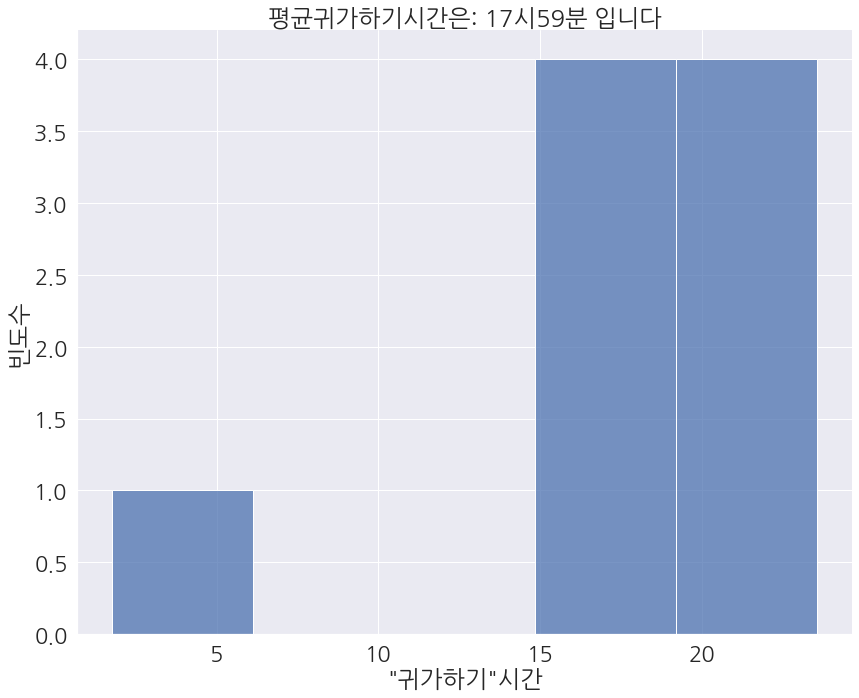

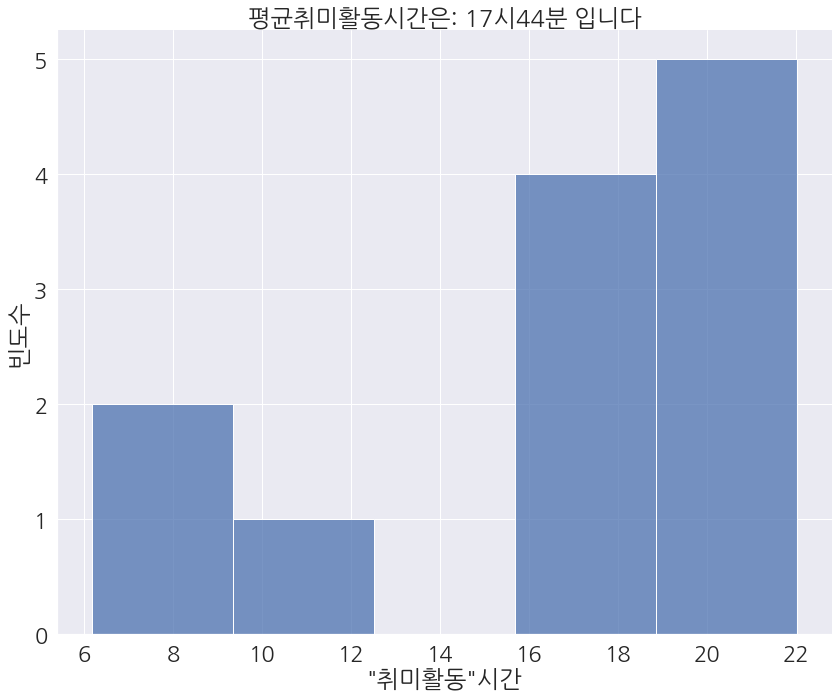

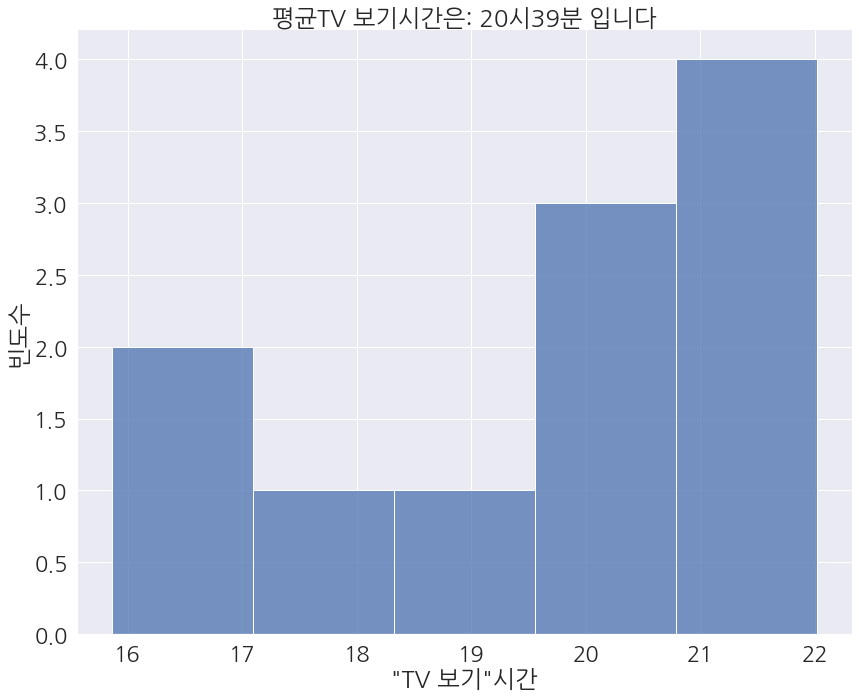

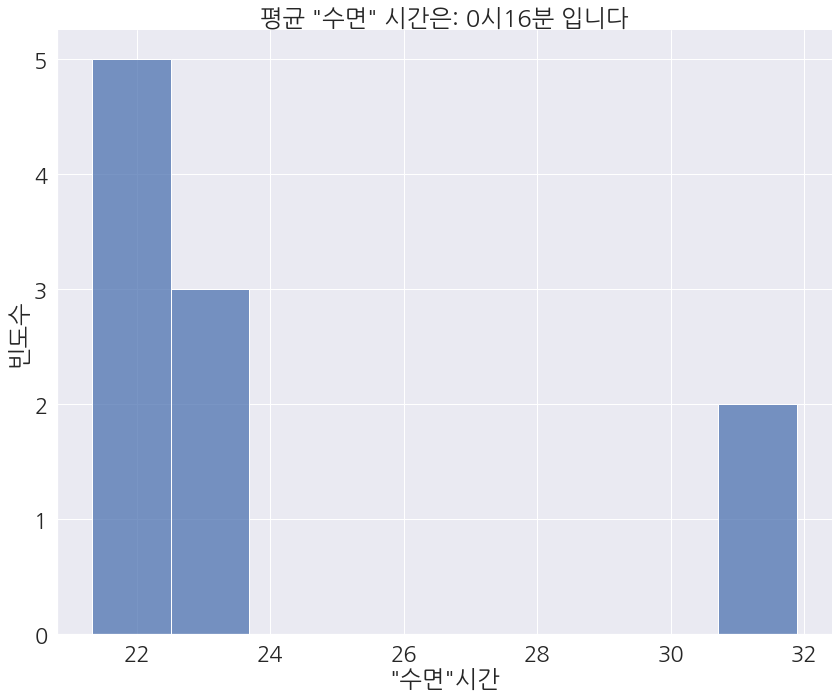

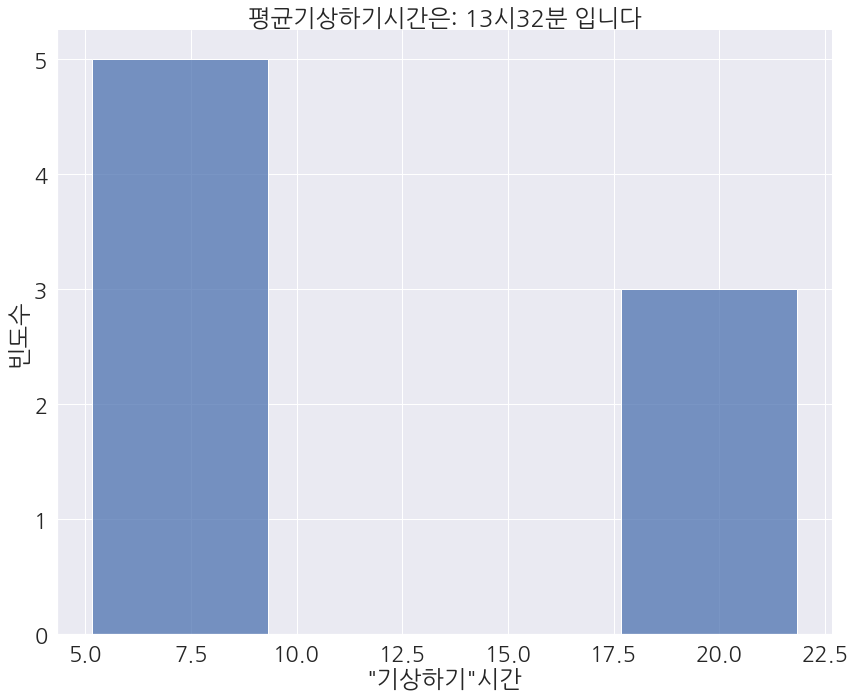

In [6]:
if __name__ == '__main__':
    main()
    pdf_path = os.getcwd() +'./pdf/' + ID + '_practice.pdf'
    pdf_path = pdf_path.replace('\\','/')
    pdf_path
    webbrowser.open_new(pdf_path)